###  Principal Component Analysis

### Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

### The Wine Data


In [2]:
wine_df = pd.read_csv('wine.csv') 
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### EDA

In [3]:
wine_df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
wine_df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [5]:
wine_df.shape

(178, 14)

In [6]:
wine_df.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

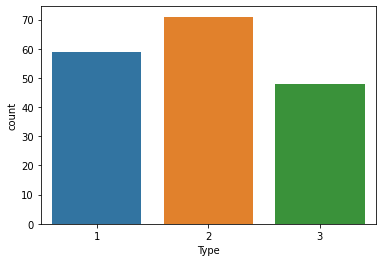

In [17]:
import seaborn as sns
sns.countplot(x=wine_df['Type'])

In [7]:
#standerdization
wine_scaled = scale(wine_df.iloc[:,1:])
wine_scaled.shape

(178, 13)

### Clustering

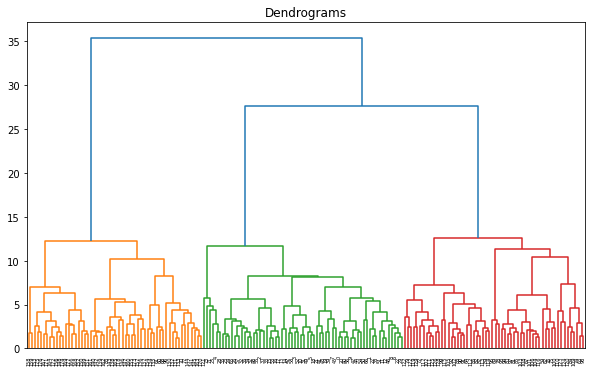

In [10]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 6))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(wine_scaled, method='ward'))

### PCA

In [8]:
pca = PCA()
pca_values = pca.fit_transform(wine_scaled)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [9]:
# pca weights
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [10]:
# variance in each pca (amount of information contain by each pca)
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [11]:
#amount of information present in each pca
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

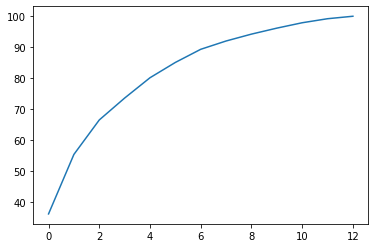

In [12]:
# variance plot
plt.plot(var1)

#first 5 pca contain 85% information

In [36]:
#pc1 scores
pca_values[:,:1]

array([[ 3.31675081],
       [ 2.20946492],
       [ 2.51674015],
       [ 3.75706561],
       [ 1.00890849],
       [ 3.05025392],
       [ 2.44908967],
       [ 2.05943687],
       [ 2.5108743 ],
       [ 2.75362819],
       [ 3.47973668],
       [ 1.7547529 ],
       [ 2.11346234],
       [ 3.45815682],
       [ 4.31278391],
       [ 2.3051882 ],
       [ 2.17195527],
       [ 1.89897118],
       [ 3.54198508],
       [ 2.0845222 ],
       [ 3.12440254],
       [ 1.08657007],
       [ 2.53522408],
       [ 1.64498834],
       [ 1.76157587],
       [ 0.9900791 ],
       [ 1.77527763],
       [ 1.23542396],
       [ 2.18840633],
       [ 2.25610898],
       [ 2.50022003],
       [ 2.67741105],
       [ 1.62857912],
       [ 1.90269086],
       [ 1.41038853],
       [ 1.90382623],
       [ 1.38486223],
       [ 1.12220741],
       [ 1.5021945 ],
       [ 2.52980109],
       [ 2.58809543],
       [ 0.66848199],
       [ 3.07080699],
       [ 0.46220914],
       [ 2.10135193],
       [ 1

In [14]:
wine_pc = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']),wine_df['Type']],axis=1)

In [15]:
# First 3 principal components
wine_pc

,pc1,pc2,pc3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


### PCA Visualization


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

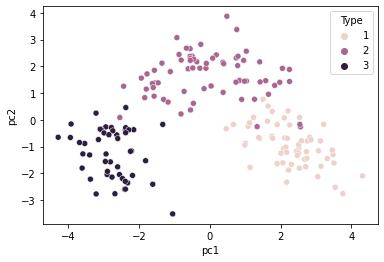

In [16]:
import seaborn as sns

sns.scatterplot(x='pc1',y='pc2',hue='Type',data=wine_pc)

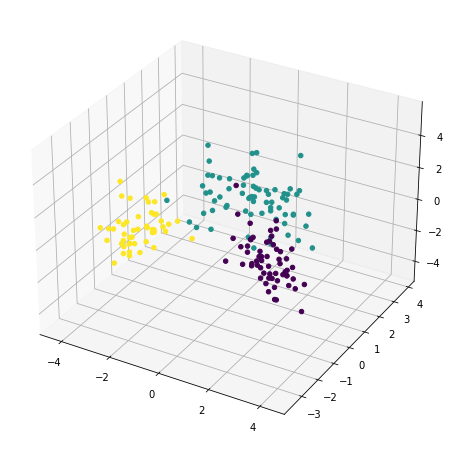

In [32]:
plt.figure(figsize=(12,8))

ax = plt.axes(projection='3d')
xdata = wine_pc.pc1
ydata = wine_pc.pc2
zdata = wine_pc.pc3
ax.scatter3D(xdata, ydata, zdata, c=wine_pc.Type,cmap='viridis',alpha=1)
plt.show()

### Clustering using Principal Components

### Hirarchical Clustering

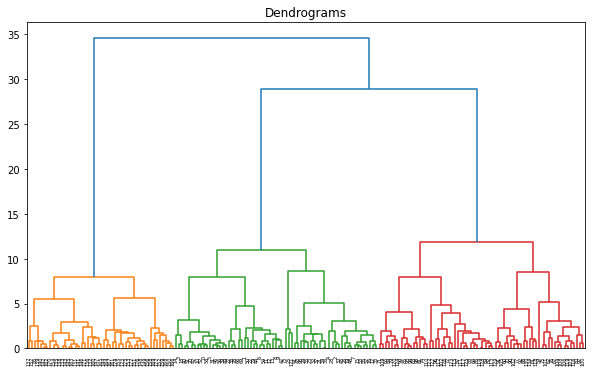

In [46]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 6))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(wine_pc.iloc[:,:3], method='ward'))

obtained same number of clusters with the original data 

### K Means Clusternig

In [47]:
from sklearn.cluster import KMeans

C:\Users\shiva\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


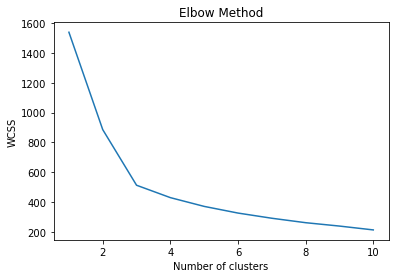

In [58]:
#decide number of clusters
pc = wine_pc.iloc[:,:3]
wcss = []  #within cluster sum of square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pc)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [61]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(pc)

KMeans(n_clusters=3)

In [70]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [68]:
wine_pc['new_labels'] = kmeans.labels_

In [73]:
wine_pc['new_labels']=wine_pc['new_labels'].replace(2, 'Cluster 1')
wine_pc['new_labels']=wine_pc['new_labels'].replace(0, 'Cluster 2')
wine_pc['new_labels']=wine_pc['new_labels'].replace(1, 'Cluster 3')

In [76]:
wine_pc.head()

,pc1,pc2,pc3,Type,new_labels
0,3.316751,-1.443463,-0.165739,1,Cluster 1
1,2.209465,0.333393,-2.026457,1,Cluster 1
2,2.516740,-1.031151,0.982819,1,Cluster 1
3,3.757066,-2.756372,-0.176192,1,Cluster 1
4,1.008908,-0.869831,2.026688,1,Cluster 1


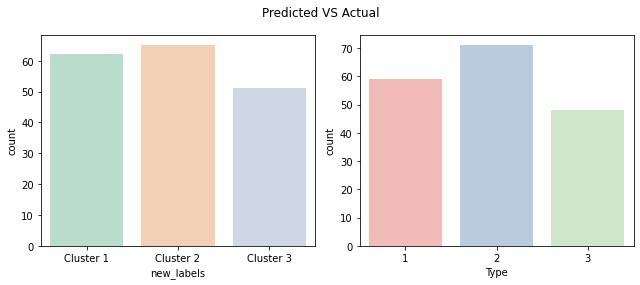

In [74]:
f, axs = plt.subplots(1,2, figsize=(9,4))
f.suptitle("Predicted VS Actual")


sns.countplot(x=wine_pc['new_labels'], ax=axs[0], palette='Pastel2')
sns.countplot(x=wine_pc['Type'], ax=axs[1], palette='Pastel1')
f.tight_layout()

obtained same number of clusters with the original data 